In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("data/crunchbase-investments.csv", encoding='unicode_escape',low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52870 entries, 0 to 52869
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   company_permalink       52869 non-null  object 
 1   company_name            52869 non-null  object 
 2   company_category_code   52227 non-null  object 
 3   company_country_code    52869 non-null  object 
 4   company_state_code      52378 non-null  object 
 5   company_region          52869 non-null  object 
 6   company_city            52337 non-null  object 
 7   investor_permalink      52868 non-null  object 
 8   investor_name           52868 non-null  object 
 9   investor_category_code  2443 non-null   object 
 10  investor_country_code   40869 non-null  object 
 11  investor_state_code     36061 non-null  object 
 12  investor_region         52868 non-null  object 
 13  investor_city           40390 non-null  object 
 14  funding_round_type      52867 non-null

In [3]:
df.head(10)

,company_permalink,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_category_code,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
0,/company/advercar,AdverCar,advertising,USA,CA,SF Bay,San Francisco,/company/1-800-flowers-com,1-800-FLOWERS.COM,NaN,USA,NY,New York,New York,series-a,2012-10-30,2012-10,2012-Q4,2012.0,2000000.0
1,/company/launchgram,LaunchGram,news,USA,CA,SF Bay,Mountain View,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2012-01-23,2012-01,2012-Q1,2012.0,20000.0
2,/company/utap,uTaP,messaging,USA,NaN,United States - Other,NaN,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2012-01-01,2012-01,2012-Q1,2012.0,20000.0
3,/company/zoopshop,ZoopShop,software,USA,OH,Columbus,columbus,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,angel,2012-02-15,2012-02,2012-Q1,2012.0,20000.0
4,/company/efuneral,eFuneral,web,USA,OH,Cleveland,Cleveland,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2011-09-08,2011-09,2011-Q3,2011.0,20000.0
5,/company/tackk,Tackk,web,USA,OH,Cleveland,Cleveland,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2012-02-01,2012-02,2012-Q1,2012.0,20000.0
6,/company/acclaimd,Acclaimd,analytics,USA,OH,Columbus,Columbus,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,angel,2012-06-01,2012-06,2012-Q2,2012.0,20000.0
7,/company/acclaimd,Acclaimd,analytics,USA,OH,Columbus,Columbus,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,angel,2012-08-07,2012-08,2012-Q3,2012.0,70000.0
8,/company/toviefor,ToVieFor,ecommerce,USA,NY,New York,New York,/company/2010-nyu-stern-business-plan-competition,2010 NYU Stern Business Plan Competition,NaN,NaN,NaN,unknown,NaN,angel,2010-04-01,2010-04,2010-Q2,2010.0,75000.0
9,/company/ohk-labs,OHK Labs,sports,USA,FL,Palm Beach,Boca Raton,/company/22hundred-group,22Hundred Group,NaN,NaN,NaN,unknown,NaN,angel,2011-09-01,2011-09,2011-Q3,2011.0,100000.0


##  Data Analysis and Data Visualization 

#### Trends over the year

Text(0.5, 1.0, 'Trends over the year')

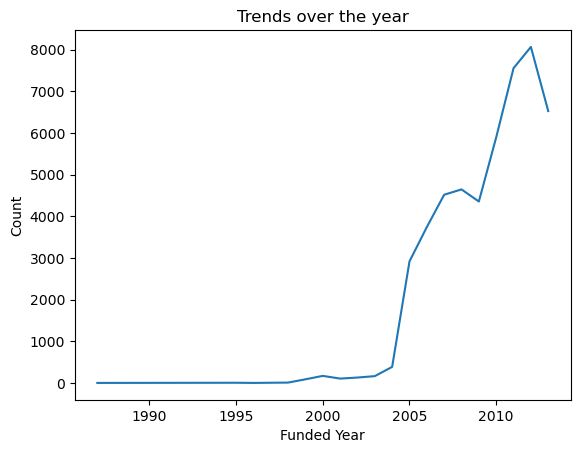

In [4]:
df.raised_amount_usd.groupby(df.funded_year).count().plot(kind='line')
plt.xlabel('Funded Year')
plt.ylabel('Count')
plt.title('Trends over the year')
#plt.xlim(10.5,16.5)

Text(0.5, 1.0, 'Categorization based on type')

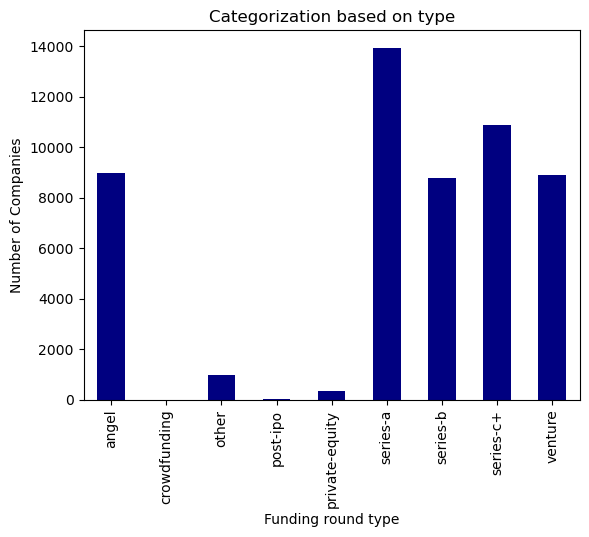

In [5]:
df.funded_year.groupby(df.funding_round_type).count().plot(kind='bar', color = 'navy')
plt.xlabel('Funding round type')
plt.ylabel('Number of Companies')
plt.title('Categorization based on type')

In [6]:
print(df.funded_year.groupby(df.funding_round_type).count())

funding_round_type
angel              8989
crowdfunding          5
other               964
post-ipo             33
private-equity      357
series-a          13938
series-b           8794
series-c+         10870
venture            8917
Name: funded_year, dtype: int64


#### Huge Valued Startups


In [7]:
df.company_name.groupby(df.raised_amount_usd).max().sort_values(ascending=False)

raised_amount_usd
43000000.0             zulily
85000000.0             zulily
4600000.0              zulily
6000000.0              zulily
3000000.0                zozi
                    ...      
6567000.0         ACT Biotech
249000000.0      A123 Systems
47566.0         7billionideas
10070000.0     41st Parameter
939000.0                 2sms
Name: company_name, Length: 1458, dtype: object

#### Preferred Investment Location

Axes(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, 'Preffered Investment Location')

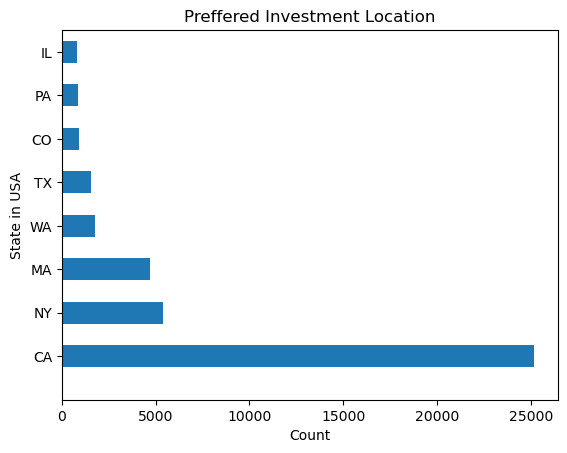

In [8]:
pref_loc = df.raised_amount_usd.groupby(df.company_state_code).count().sort_values(ascending = False).plot(kind='barh')
print(pref_loc)
plt.ylim(-1,7.5)
plt.ylabel('State in USA')
plt.xlabel('Count')
plt.title('Preffered Investment Location')

#### Breakdown of Industries

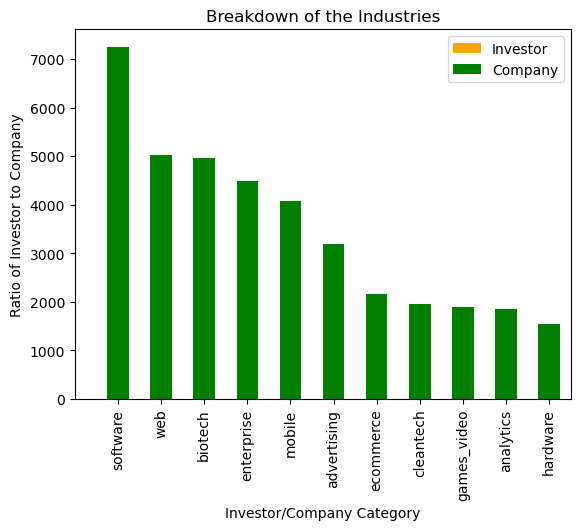

In [9]:
df.investor_category_code.groupby(df.investor_category_code).count().sort_values(ascending = False).plot(kind= 'bar', stacked= True, color='orange', label='Investor')
df.company_category_code.groupby(df.company_category_code).count().sort_values(ascending = False).plot(kind= 'bar', stacked= True, color='green', label ='Company')
plt.legend(loc='upper right')
plt.xlim(-1,10.5)
plt.title('Breakdown of the Industries')
plt.xlabel('Investor/Company Category')
plt.ylabel('Ratio of Investor to Company')
plt.savefig("Industries.png")



In [10]:
df=df.drop(['company_permalink','investor_permalink',
       'investor_category_code',
        'funded_at', 'funded_month', 'funded_quarter',
       'funded_year','investor_state_code','investor_country_code','investor_city','raised_amount_usd'],axis=1)

In [11]:
df.nunique()

company_name             11573
company_category_code       43
company_country_code         2
company_state_code          50
company_region             546
company_city              1229
investor_name            10465
investor_region            585
funding_round_type           9
dtype: int64

In [12]:
df.isnull().sum()

company_name               1
company_category_code    643
company_country_code       1
company_state_code       492
company_region             1
company_city             533
investor_name              2
investor_region            2
funding_round_type         3
dtype: int64

In [13]:
df=df.dropna(axis=0, subset=['company_category_code','company_state_code','company_country_code','company_region','company_city','funding_round_type','company_name','investor_name','investor_region'])

In [14]:
df.isnull().sum()

company_name             0
company_category_code    0
company_country_code     0
company_state_code       0
company_region           0
company_city             0
investor_name            0
investor_region          0
funding_round_type       0
dtype: int64

In [15]:
df.shape

(51468, 9)

In [16]:
df.duplicated().sum()

3824

In [17]:
df = df.drop_duplicates(subset='company_name', keep='first')

In [18]:
df.shape

(11058, 9)

In [19]:
df.duplicated().sum()

0

In [20]:
df1=df

In [21]:
df1.head()

,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_name,investor_region,funding_round_type
0,AdverCar,advertising,USA,CA,SF Bay,San Francisco,1-800-FLOWERS.COM,New York,series-a
1,LaunchGram,news,USA,CA,SF Bay,Mountain View,10Xelerator,Columbus,other
3,ZoopShop,software,USA,OH,Columbus,columbus,10Xelerator,Columbus,angel
4,eFuneral,web,USA,OH,Cleveland,Cleveland,10Xelerator,Columbus,other
5,Tackk,web,USA,OH,Cleveland,Cleveland,10Xelerator,Columbus,other


In [22]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [23]:
df.columns

Index(['company_name', 'company_category_code', 'company_country_code',
       'company_state_code', 'company_region', 'company_city', 'investor_name',
       'investor_region', 'funding_round_type'],
      dtype='object')

## Content Based Recommender System

In [24]:
features = ['company_name','company_category_code', 'company_country_code',
       'company_state_code', 'company_region', 'company_city', 'investor_name',
       'investor_region', 'funding_round_type']

In [25]:
for feature in features:
    df1[feature] = df1[feature].apply(clean_data)

In [26]:
df1.head()

,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_name,investor_region,funding_round_type
0,advercar,advertising,usa,ca,sfbay,sanfrancisco,1-800-flowers.com,newyork,series-a
1,launchgram,news,usa,ca,sfbay,mountainview,10xelerator,columbus,other
3,zoopshop,software,usa,oh,columbus,columbus,10xelerator,columbus,angel
4,efuneral,web,usa,oh,cleveland,cleveland,10xelerator,columbus,other
5,tackk,web,usa,oh,cleveland,cleveland,10xelerator,columbus,other


In [27]:
df1.columns

Index(['company_name', 'company_category_code', 'company_country_code',
       'company_state_code', 'company_region', 'company_city', 'investor_name',
       'investor_region', 'funding_round_type'],
      dtype='object')

In [28]:
df['metric'] = df[['company_category_code', 'company_country_code',
       'company_state_code', 'company_region', 'company_city', 'investor_name',
       'investor_region', 'funding_round_type']].apply(lambda x: " ".join(x), axis=1)

In [29]:
df1.metric[3]

'software usa oh columbus columbus 10xelerator columbus angel'

In [30]:
df1.columns

Index(['company_name', 'company_category_code', 'company_country_code',
       'company_state_code', 'company_region', 'company_city', 'investor_name',
       'investor_region', 'funding_round_type', 'metric'],
      dtype='object')

In [31]:
df2=df1.drop(['company_category_code', 'company_country_code',
       'company_state_code', 'company_region', 'company_city', 'investor_name',
       'investor_region', 'funding_round_type'],axis=1)

In [32]:
df2.head()

,company_name,metric
0,advercar,advertising usa ca sfbay sanfrancisco 1-800-fl...
1,launchgram,news usa ca sfbay mountainview 10xelerator col...
3,zoopshop,software usa oh columbus columbus 10xelerator ...
4,efuneral,web usa oh cleveland cleveland 10xelerator col...
5,tackk,web usa oh cleveland cleveland 10xelerator col...


In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
cv = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
cv_matrix = cv.fit_transform(df2['metric'])
cv_matrix.shape

(11058, 21004)

In [35]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(cv_matrix, cv_matrix)

In [36]:
cosine_sim[100]

array([0.22256595, 0.06726728, 0.05292561, ..., 0.52941176, 0.52941176,
       0.06262243])

In [37]:
df2= df2.reset_index()
indices = pd.Series(df2.index, index=df2['company_name'])

In [55]:

def get_recommendations(company_name):
    idx = indices[company_name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    company_indices = [i[0] for i in sim_scores]
    return df['company_name'].iloc[company_indices]

In [56]:
get_recommendations("rennovia")

3763           ceterixorthopaedics
3733                       relypsa
3736       kalobiospharmaceuticals
3748                      achaogen
3751                       igenica
3752           inclinetherapeutics
5055                cruxbiomedical
5219     fundamentalappliedbiology
5934           coriuminternational
11011                      numedii
Name: company_name, dtype: object

In [61]:
get_recommendations("relypsa")

3752        inclinetherapeutics
1595                    codexis
1785          pearltherapeutics
3736    kalobiospharmaceuticals
3741                   rennovia
3748                   achaogen
3751                    igenica
3763        ceterixorthopaedics
5108               aegeamedical
9744        relievantmedsystems
Name: company_name, dtype: object

In [60]:
df['company_name'][3733]

'relypsa'

In [42]:
df['metric'][3733]

'biotech usa ca sfbay redwoodcity 5amventures sfbay series-a'

In [43]:
df['company_name'][3752]

'inclinetherapeutics'

In [44]:
df['metric'][3752]

'biotech usa ca sfbay redwoodcity 5amventures sfbay series-a'

In [45]:
df['company_name'][1785]

'pearltherapeutics'

In [46]:
df['metric'][1785]

'biotech usa ca sfbay redwoodcity nektartherapeutics sfbay series-a'

In [47]:
df['company_name'][9744]

'relievantmedsystems'

In [48]:
df['metric'][9744]

'biotech usa ca sfbay redwoodcity canaanpartners sfbay series-c+'

In [50]:
import pickle
pickle.dump(df,open('models/data.pkl','wb'))
pickle.dump(df2,open('models/data2.pkl','wb'))
pickle.dump(cosine_sim,open('models/cosine_sim.pkl','wb'))

In [51]:
d5= pickle.load(open('models/data.pkl','rb'))
pd.DataFrame(d5)

,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_name,investor_region,funding_round_type,metric
0,advercar,advertising,usa,ca,sfbay,sanfrancisco,1-800-flowers.com,newyork,series-a,advertising usa ca sfbay sanfrancisco 1-800-fl...
1,launchgram,news,usa,ca,sfbay,mountainview,10xelerator,columbus,other,news usa ca sfbay mountainview 10xelerator col...
3,zoopshop,software,usa,oh,columbus,columbus,10xelerator,columbus,angel,software usa oh columbus columbus 10xelerator ...
4,efuneral,web,usa,oh,cleveland,cleveland,10xelerator,columbus,other,web usa oh cleveland cleveland 10xelerator col...
5,tackk,web,usa,oh,cleveland,cleveland,10xelerator,columbus,other,web usa oh cleveland cleveland 10xelerator col...
...,...,...,...,...,...,...,...,...,...,...
52715,thecultivate,ecommerce,usa,ny,newyork,newyork,williamlacalle,unknown,angel,ecommerce usa ny newyork newyork williamlacall...
52746,egood,web,usa,ca,losangeles,glendora,wolfgangbuehler,unknown,series-a,web usa ca losangeles glendora wolfgangbuehler...
52764,yushino,games_video,usa,ny,newyork,newyork,yiannistsiounis,unknown,angel,games_video usa ny newyork newyork yiannistsio...
52774,seetoo,enterprise,usa,ny,newyork,newyork,yossivardi,unknown,angel,enterprise usa ny newyork newyork yossivardi u...
